## **Zadanie 5 - Perceptron Dwuwarstwowy**

Cel zadania polega na implementacji perceptronu dwuwarstwowego oraz nauczeniu go reprezentowania zadanej funkcji $f(x)$, opisującej rozkład Laplace'a. Funkcja ta jest dana wzorem:

\begin{equation}
    f(x) = \frac{1}{2b}e^{-\frac{|x-u|}{b}}
\end{equation}
gdzie:
- Zakres $x: [-8, 8]$
- Wartości $\mu$ i $b$: $\mu = 0$ i $b = 1$

**Kroki do wykonania:**
1. Zaimplementuj drzewo decyzyjne ID3 (z ograniczeniem jego maksymalnej głębokości).
2. Zbadaj skuteczność działania kasyfikatora dla zbioru danych Tic-Tac-Toe Endgame, obliczając dokładność i macierz pomyłek.

**Uwagi:**
- Zaimplementuj perceptron dwuwarstwowy, który będzie reprezentował funkcję $f(x)$ dla zadanego zakresu $x$ oraz wartości $\mu$ i $b$.
- Zbadaj jakość aproksymacji, obliczając Mean Squared Error (MSE) oraz Mean Absolute Error (MAE) między wartościami rzeczywistymi funkcji a wartościami przewidywanymi przez sieć.
- Przedstaw wykres funkcji rzeczywistej oraz funkcji przewidywanej przez sieć.
- Zbadaj, jak liczba neuronów w warstwie ukrytej wpływa na jakość aproksymacji, zmieniając jej wartość i porównując wyniki.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

In [4]:
def laplace(x, mu=0, b=1):
    return 1/(2*b) * np.exp(-np.abs(x-mu)/b)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [6]:
def visualize_function(x, y, title, xlabel='x', ylabel='f(x)'):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

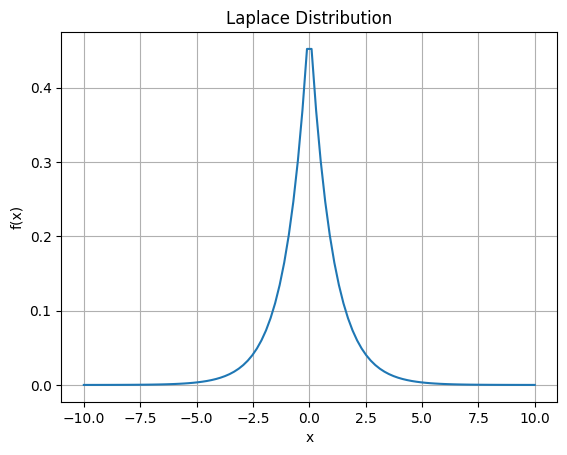

In [7]:
x = np.linspace(-10, 10, 100)
y = laplace(x)

visualize_function(x, y, 'Laplace Distribution')

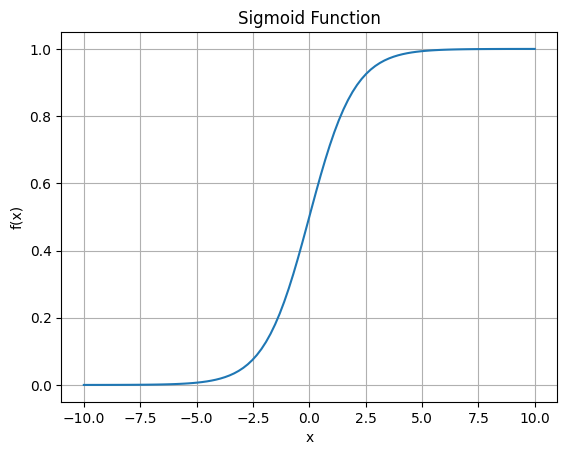

In [8]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

visualize_function(x, y, 'Sigmoid Function')

$y_i$ - prawdziwa wartość, $\hat{y}_i$ - przewidywana wartość, $n$ - liczba próbek

**Mean Squared Error (MSE)**:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

**Mean Absolute Error (MAE)**:

$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$


In [9]:
# dla jednego przykladu n=1
def mse_loss(y_true, y_pred):
    return (y_true - y_pred) ** 2

def mae_loss(y_true, y_pred):
    return np.abs(y_true - y_pred)

In [10]:
def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

def mae_loss_derivative(y_true, y_pred):
    return np.where(y_pred > y_true, 1, -1)

Perceptron dwuwarstwowy składa się z trzech warstw:
1. Warstwa wejściowa - zawiera wejściowe cechy $x$.
2. Warstwa ukryta - zawiera neurony, które przetwarzają wejścia i przekazują je do warstwy wyjściowej.
3. Warstwa wyjściowa - zawiera neurony, które przetwarzają dane z warstwy ukrytej i generują wynik.

**Inicjalizacja parametrów sieci:**
- Wagi neuronów wyjściowych są zerowane.
- Wagi neuronów warstwy ukrytej są inicjalizowane losowo z rozkładem $~U(-1/\sqrt{we}, 1/\sqrt{we})$, gdzie $we$ to liczba wejść do neuronu.


**Propagacja w przód:**
\begin{equation}
    h = \sigma(W_1 \cdot x + b_1)
\end{equation}

\begin{equation}
    \hat{y} = W_2 \cdot h + b_2
\end{equation}


gdzie:
- $W_1$ - wagi warstwy wejściowej
- $b_1$ - bias warstwy wejściowej
- $\sigma$ - funkcja aktywacji warstwy ukrytej
- $W_2$ - wagi warstwy wyjściowej
- $b_2$ - bias warstwy wyjściowej


**Propagacja wsteczna:**
Wagi są aktualizowane na podstawie błędu popełnionego przez sieć. Błąd jest obliczany na podstawie różnicy między wartościami rzeczywistymi a przewidywanymi przez sieć (MSE lub MAE). Następnie wagi są aktualizowane w kierunku przeciwnym do gradientu funkcji kosztu. Kolejne wagi są aktualizowane zgodnie z regułą:

\begin{equation}
    W = W - \alpha \frac{\partial L}{\partial W}
\end{equation}

\begin{equation}
    b = b - \alpha \frac{\partial L}{\partial b}
\end{equation}


gdzie:
- $L$ - funkcja kosztu
- $\alpha$ - współczynnik uczenia


In [169]:
class Perceptron:
    def __init__(self, size_in, size_hidden, size_out):
        self.W1, self.W2, self.b1, self.b2 = self.initialize_parameters(size_in, size_hidden, size_out)

    def initialize_parameters(self, size_in, size_hidden, size_out):
        # initialize weights using Uniform distribution
        uniform_range = 1/np.sqrt(size_in)
        W1 = np.random.uniform(-uniform_range, uniform_range, (size_hidden, size_in))
        W2 = np.random.uniform(-uniform_range, uniform_range, (size_out, size_hidden))
        b1 = np.zeros((size_hidden, 1))
        b2 = np.zeros((size_out, 1))
        return W1, W2, b1, b2

    def forward(self, x):
        z1 = np.dot(self.W1, x) + self.b1
        a1 = sigmoid(z1)
        z2 = np.dot(self.W2, a1) + self.b2
        return z1, a1, z2

    def backpropagation(self, x, y, z1, a1, z2):
        dL_dz2 = mse_loss_derivative(y, z2)

        dL_dW2 = np.dot(dL_dz2, a1.T)
        dL_db2 = dL_dz2

        dL_da1 = np.dot(self.W2.T, dL_dz2)
        dL_dz1 = dL_da1 * sigmoid_derivative(z1)
        dL_dW1 = np.dot(dL_dz1, x.T)
        dL_db1 = dL_dz1

        return dL_dW1, dL_db1, dL_dW2, dL_db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def shuffle(self, x, y):
        indices = np.arange(x.shape[1])
        np.random.shuffle(indices)
        return x[:, indices], y[:, indices]

    def train(self, x, y, epochs, learning_rate):
        for i in range(epochs):
            epoch_loss = 0

            # shuffle samples
            x, y = self.shuffle(x, y)

            for j in range(x.shape[1]):
                x_sample = x[:, j].reshape(-1, 1)
                y_sample = y[:, j].reshape(-1, 1)
                z1, a1, z2 = self.forward(x_sample)
                dW1, db1, dW2, db2 = self.backpropagation(x_sample, y_sample, z1, a1, z2)
                self.update_parameters(dW1, db1, dW2, db2, learning_rate)

                epoch_loss += mse_loss(y_sample, z2)

            if i % 10 == 0:
                print(f'Epoch {i}, loss: {epoch_loss / x.shape[1]}')

    def predict(self, x):
        _, _, z2 = self.forward(x)
        return z2

In [180]:
mu = 0
b = 1
size_in = 1
size_hidden = 748
size_out = 1

# generate data
x_all = np.linspace(-8, 8, 10_000).reshape(1, -1)
y_all = laplace(x_all, mu, b)

# shuffle data
indices = np.arange(x_all.shape[1])
np.random.shuffle(indices)
x_all_shuffled = x_all[:, indices]
y_all_shuffled = y_all[:, indices]

# split to train and test set
x_train = x_all_shuffled[:, :800]
y_train = y_all_shuffled[:, :800]
x_test = x_all_shuffled[:, 800:]
y_test = y_all_shuffled[:, 800:]

x = x_train.reshape(1, -1)
y = y_train.reshape(1, -1)

model = Perceptron(size_in, size_hidden, size_out)
model.train(x, y, epochs=100, learning_rate=0.001)

Epoch 0, loss: [[0.06910423]]
Epoch 10, loss: [[0.00303728]]
Epoch 20, loss: [[0.00217891]]
Epoch 30, loss: [[0.00197491]]
Epoch 40, loss: [[0.00189439]]
Epoch 50, loss: [[0.00179083]]
Epoch 60, loss: [[0.00179749]]
Epoch 70, loss: [[0.00178581]]
Epoch 80, loss: [[0.00160895]]
Epoch 90, loss: [[0.00163738]]


In [181]:
def visualize_predictions(x, y_true, y_pred, title, xlabel='x', ylabel='f(x)'):
    plt.plot(x, y_true, label='True')
    plt.plot(x, y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

In [183]:
y_preds = []

for x_sample, y_sample in zip(x_test[0], y_test[0]):
    x_sample = np.array([x_sample]).reshape(1, 1)
    y_preds.append(model.predict(x_sample)[0][0])

In [184]:
sorted_indices = np.argsort(x_test[0])
x_test_sorted = x_test[0][sorted_indices]
y_test_sorted = y_test[0][sorted_indices]
y_test_preds = np.array(y_preds)[sorted_indices]

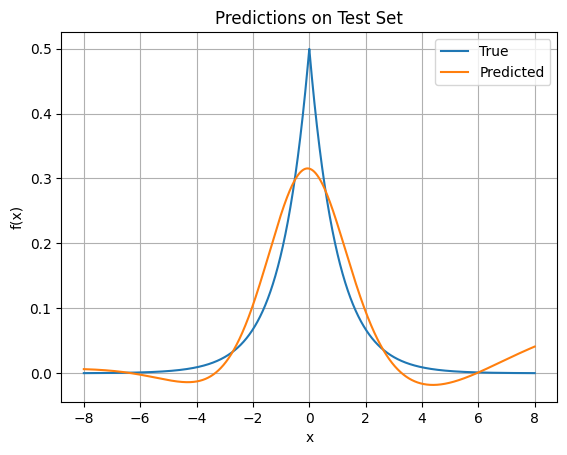

In [185]:
visualize_predictions(x_test_sorted, y_test_sorted, y_test_preds, 'Predictions on Test Set')